# FIT5196 Assessment 2 Task 4
#### Student Name: Vipul Krishnan Muralee Dharan
#### Student ID: 28104641

Date: 11/05/2018

Version: 1.0

Environment: Python 3.6.1 and Anaconda 4.3.21 (64-bit)

Libraries used:
* pandas v0.20.1 (for dataframe operations)
* statsmodels v0.8.0 (for linear regression, multivariate outlier prediction)


## 1. Introduction
In this task, we are required to identify the outliers and delete those rows with outliers by analyzing the dataset4 (dataset4_with_outliers.csv)

## 2. Installing and Importing Libraries
We have to install statsmodel package for detecting multimaviate outliers using linear regression

In [1]:
!pip install statsmodels

You are using pip version 9.0.2, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 3. Loading and Examining Data
The first step is to load the data from the CSV file.

In [3]:
# loading data 
df1 = pd.read_csv('dataset4_with_outliers.csv')

In [4]:
# for getting an overview of the data
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


In [5]:
# describing the data
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.996000e+03,9.996000e+03,9996.000000,9996.000000,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.598579e+09,4.980468e+05,3.356943,2.082558,2025.039916,1.547281e+04,1.487345,0.002401,0.194678,3.374250,7.593037,1750.824930,274.214986,1972.056423,68.046919,98078.460984,47.555261,-122.212583
std,2.880071e+09,2.540477e+05,0.937060,0.736420,854.963922,4.297506e+04,0.540751,0.048943,0.679519,0.623769,1.112505,793.994317,418.925228,28.847071,362.111900,53.448592,0.142261,0.140801
min,1.000102e+06,8.995000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000
25%,2.126049e+09,3.200000e+05,3.000000,1.500000,1400.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98033.000000,47.456775,-122.329000
50%,3.905060e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.509500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1976.000000,0.000000,98065.000000,47.563500,-122.228000
75%,7.371500e+09,6.100000e+05,4.000000,2.500000,2480.000000,1.036150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,520.000000,1998.000000,0.000000,98118.000000,47.679900,-122.122000
max,9.900000e+09,2.700000e+06,20.000000,6.500000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2610.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


There can be univariate and multivariate ouliers in the data. The univariate outliars concerns the distribution of a sinlge variable where as the multivariate concerns outliars in an n-dimentsional space (Pearson, 2005).

If there is a relationship between some variables in the data, we can use multivariate techniques. So, if we can identify the relationships, it would be easier. Below is the list of some obviously probable relationships.

* sqft_lot : can depend on the zip code. (eg. in the middle of city, it is less probable to have a large plot.)
* bedrooms : depends on sqft_above (This provides an upper limit, ie. maximum possible bedrooms)
* bathrooms : depends on bedrooms. It is highly unprobable that the No. bathrooms > (1 + No. bedrroms)
* sqft_living : sqft_living <= sqft_lot * No. floors + sqft_basement
* sqft_basement : sqft_basement <= sqft_lot
* lat, long : depends on zip
* condition -> depends on renovation year or built year
* price -> depends on almost all the variables


Please note that these relations just assumptions and are stated just for the easiness of the analysis. It is written as a 'çause to result' style (eg. sqft_living decides price. Although we can use the inverse of this relation, in the real world this is the actual truth) although some of the relations are chosen as the inverse (eg zipcode decides lat and long).


Now we start with independent values for which we use univariate outlier detection.

## 4. Detecting Outliers
We check variables one by one for outliers. Please note that we dont need to perform univariate outlier detection on attributes such as waterfront, grade, condtion etc. There are just indexes and we cant judge. Hiwever we can check for multivariate outliers if they show some relation with other variable.


### Zipcode

Most probably, the zipcodes depends on the place. Near places have adjuscent numbers as zipcodes. So, for finding any univariate outliers, we just check if the zipcodes are all numbers coming inside a narrow range

In [6]:
# finding the maximum value of the zipcode
df1.zipcode.max()

98199

In [7]:
# finding the minimum value of the zipcode
df1.zipcode.min()

98001

As these are acceptable minimum and maximum values, we can assume that there is no outliers in this

### sqft_lot

Although the area of the land can vary, it depends on the region. For eample it highly unprobable that a house in the middle of the cityt to to have a large land area.

We use quartile based detection [ref idananm Mining Imperfect Data, Ronald K Pearson]. For each zipcode, we perform sepersately for getting more accurate results. To get an idea of the distribution, we plot it first.

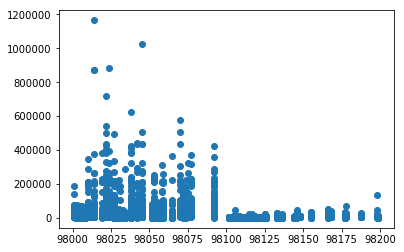

In [8]:
# plotting sqft_living for each zipcode
plt.plot(df1.zipcode, df1.sqft_lot, 'o')

As we can see there can be outliers in this. We use the below code to eliminate them. (Please note that this operation can take up to 1 minute as it performs for each zipcode seperately)

In [9]:
# finding all possible zipcodes
zips = df1.zipcode.unique()

In [10]:
# finding and eliminating the outliers in sqft_lot for each zipcode
# Please note that this operation can take up to 1 minute
for z in zips:
    
    # find all entries with that zip code
    dfz = df1[df1.zipcode == z]
    # find quartiles
    z7 = dfz.sqft_lot.quantile(.75)
    z2 = dfz.sqft_lot.quantile(.25)
    z5 = dfz.sqft_lot.quantile(.50)
    # upper and lower limits for detecting ouliers
    upper_limit = z7 + 1.5*(z7-z2)
    lower_limit = z2 - 1.5*(z7-z2)
    # applying o the datasets
    df1 = df1[df1.apply(lambda x: (x.zipcode !=z ) | ((x.zipcode ==z ) & (x.sqft_lot > lower_limit) & (x.sqft_lot < upper_limit)), axis = 1)] 

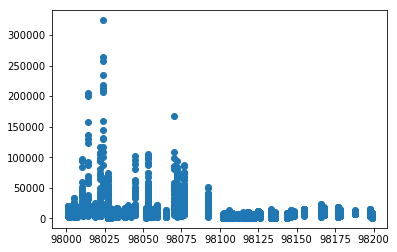

In [11]:
# plotting sqft_living for each zipcode
plt.plot(df1.zipcode, df1.sqft_lot, 'o')

As seen in the figure, we have removed a number of possible outliers

### Latitude and Longitude

The longitude and langitude depends on the zipcode. As a common fact, zips are allocated for regions. If there is big difference in the longitude and latitude values of places in same zip code, it can be an outlier.

We plot the long values first

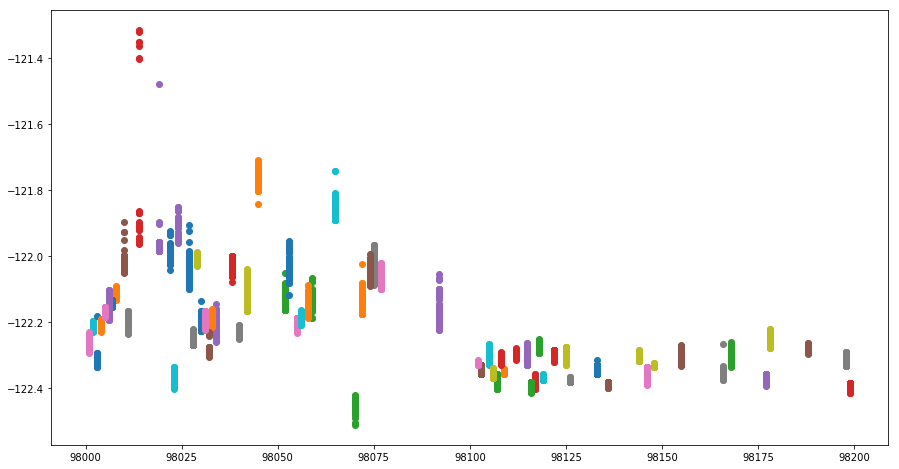

In [12]:
plt.figure(figsize=(15,8))
for z in zips:
# plotting long for each zipcode
    plt.plot(df1[df1.zipcode == z].zipcode, df1[df1.zipcode == z].long, 'o', )

As in the figure, there are some suspeted isolated points.We can use the same rule as in the case of sqft_living to eliminate these.

In [13]:
# finding and eliminating the outliers in long for each zipcode
# Please note that this operation can take up to 1 minute
for z in zips:
    
    # find all entries with that zip code
    dfz = df1[df1.zipcode == z]
    # find quartiles
    z7 = dfz.long.quantile(.75)
    z2 = dfz.long.quantile(.25)
    z5 = dfz.long.quantile(.50)
    # upper and lower limits for detecting ouliers
    upper_limit = z7 + 1.5*(z7-z2)
    lower_limit = z2 - 1.5*(z7-z2)
    # applying o the datasets
    df1 = df1[df1.apply(lambda x: (x.zipcode !=z ) | ((x.zipcode ==z ) & (x.long > lower_limit) & (x.long < upper_limit)), axis = 1)] 

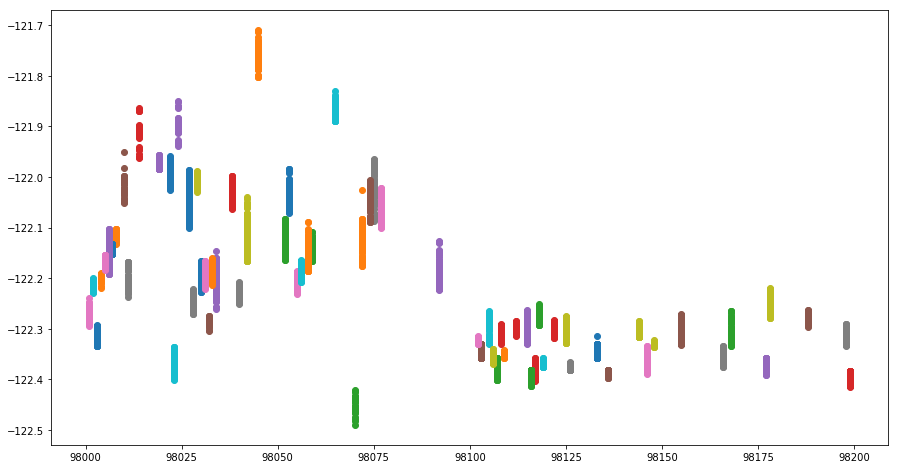

In [14]:
plt.figure(figsize=(15,8))
for z in zips:
# plotting long for each zipcode
    plt.plot(df1[df1.zipcode == z].zipcode, df1[df1.zipcode == z].long, 'o')

Now we do the same for the latitude data.

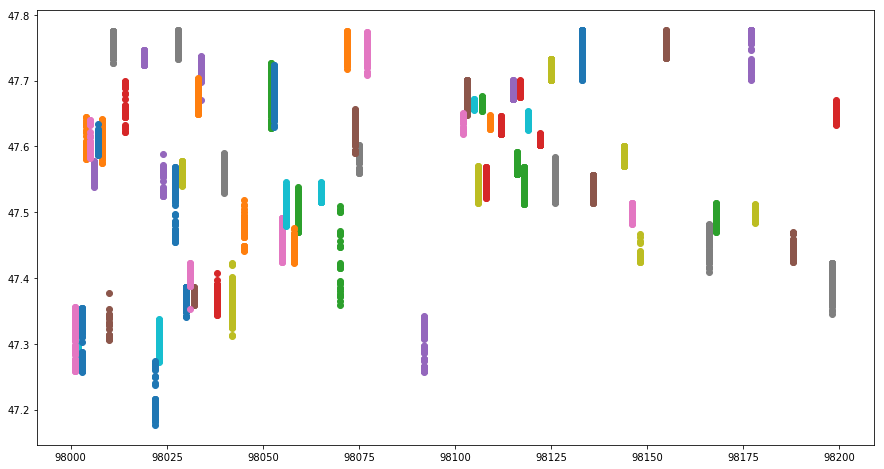

In [15]:
# plotting latitude vs zipcode before operation
plt.figure(figsize=(15,8))
for z in zips:
# plotting lat for each zipcode
    plt.plot(df1[df1.zipcode == z].zipcode, df1[df1.zipcode == z].lat, 'o')

In [16]:
# finding and eliminating the outliers in lat for each zipcode
# Please note that this operation can take up to 1 minute
for z in zips:
     # find all entries with that zip code
    dfz = df1[df1.zipcode == z]
    # find quartiles
    z7 = dfz.lat.quantile(.75)
    z2 = dfz.lat.quantile(.25)
    z5 = dfz.lat.quantile(.50)
    # upper and lower limits for detecting ouliers
    upper_limit = z7 + 1.5*(z7-z2)
    lower_limit = z2 - 1.5*(z7-z2)
    # applying o the datasets
    df1 = df1[df1.apply(lambda x: (x.zipcode !=z ) | ((x.zipcode ==z ) & (x.lat > lower_limit) & (x.lat < upper_limit)), axis = 1)] 
    

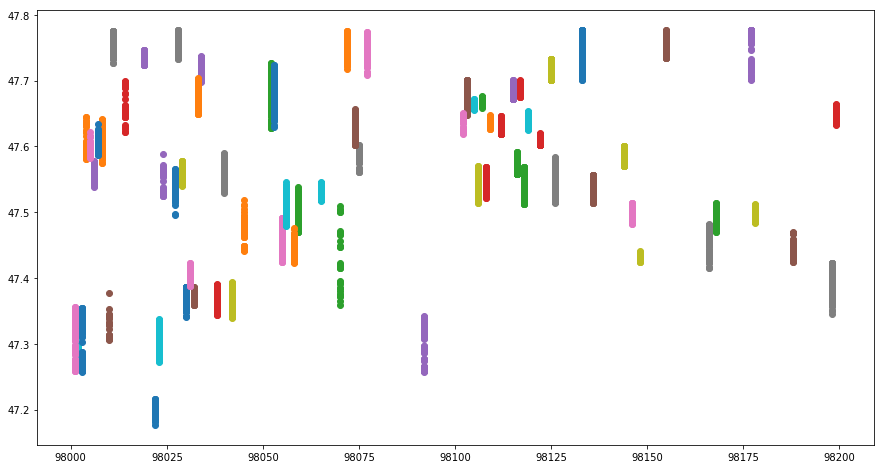

In [17]:
plt.figure(figsize=(15,8))
for z in zips:
# plotting lat for each zipcode
    plt.plot(df1[df1.zipcode == z].zipcode, df1[df1.zipcode == z].lat, 'o')

### sqft_living

We plot sqft_living against every other variable to clearly determine it's relations.

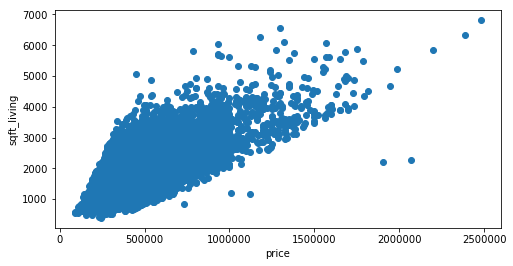

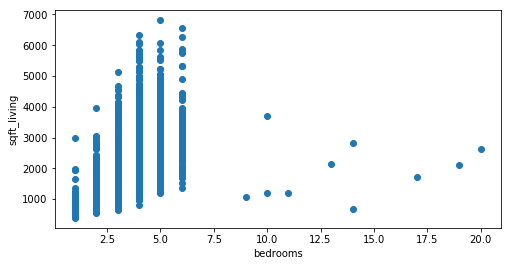

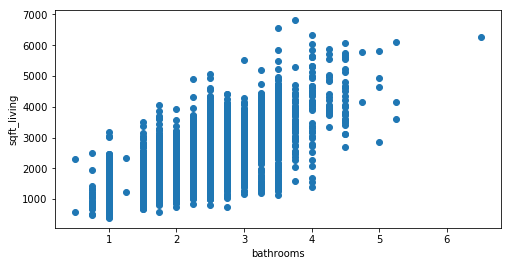

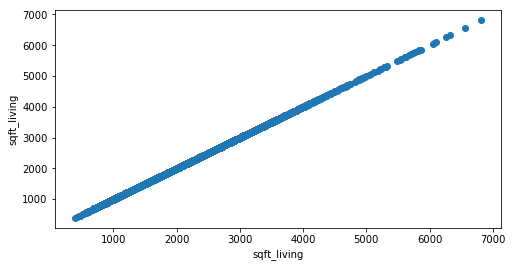

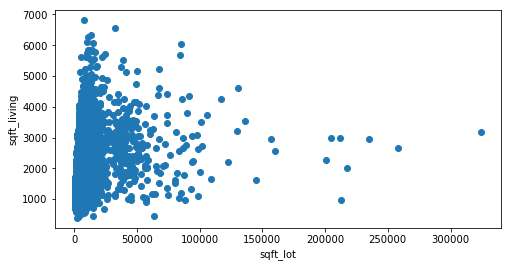

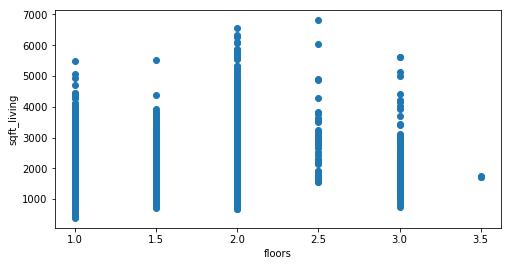

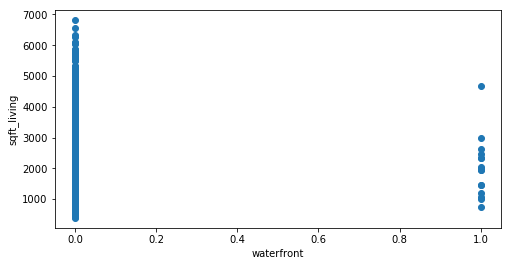

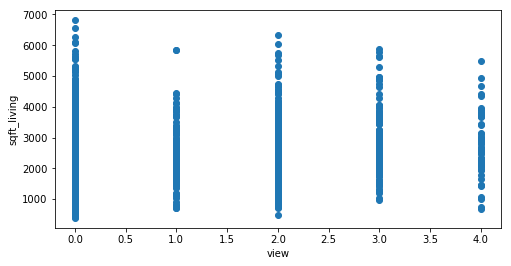

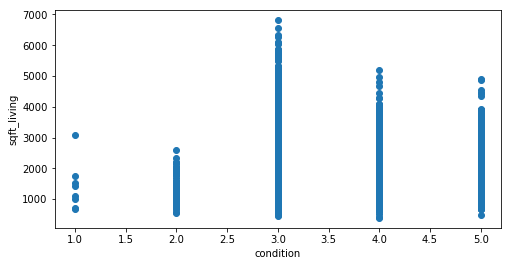

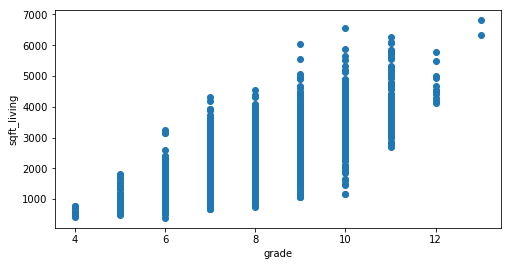

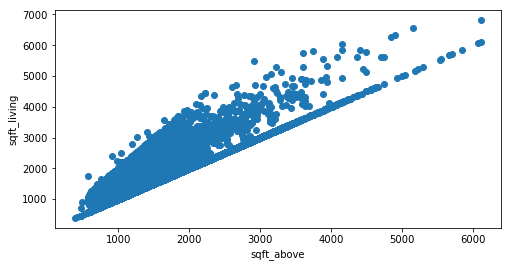

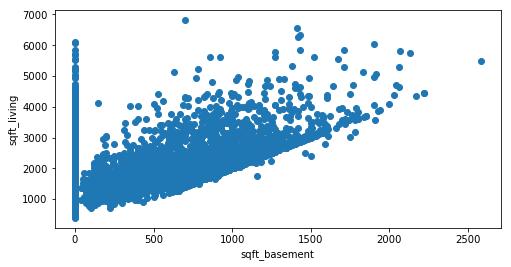

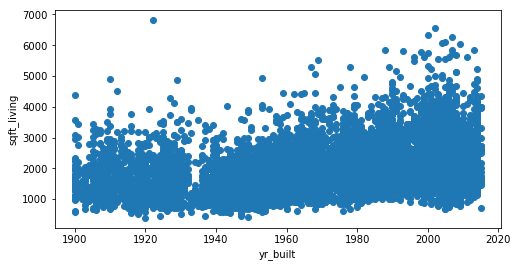

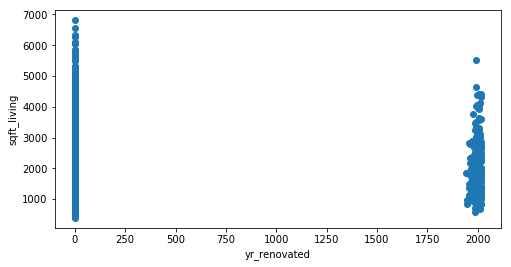

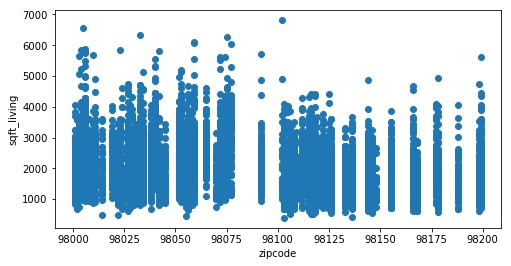

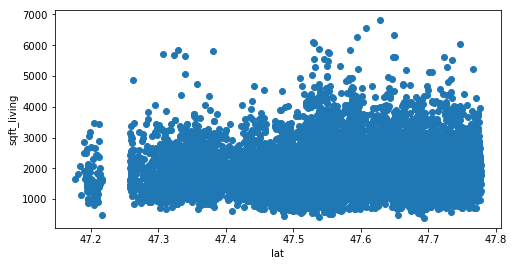

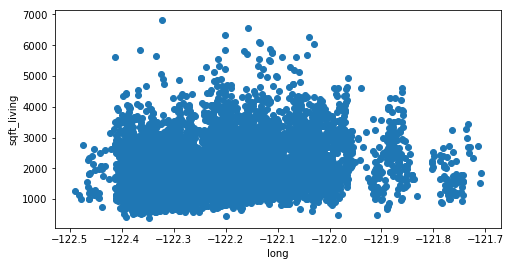

In [18]:
for c in df1.columns[2:]:
    plt.figure(figsize=(8,4))
    plt.plot(df1[c], df1.sqft_living, 'o')
    plt.xlabel(c)
    plt.ylabel("sqft_living")

we will care about the price, bedroom etc later. Now we just look for the relations with varibles which we already processes. We can see that this also depends on the zip code. Possibily houses in city are smaller than the ones outside city.

In [19]:
# finding and eliminating the outliers in sqft_living for each zipcode
# Please note that this operation can take up to 1 minute
for z in zips:
    
    # find all entries with that zip code
    dfz = df1[df1.zipcode == z]
    # find quartiles
    z7 = dfz.sqft_living.quantile(.75)
    z2 = dfz.sqft_living.quantile(.25)
    z5 = dfz.sqft_living.quantile(.50)
    # upper and lower limits for detecting ouliers
    upper_limit = z7 + 1.5*(z7-z2)
    lower_limit = z2 - 1.5*(z7-z2)
    # applying o the datasets
    df1 = df1[df1.apply(lambda x: (x.zipcode !=z ) | ((x.zipcode ==z ) & (x.sqft_living > lower_limit) & (x.sqft_living < upper_limit)), axis = 1)] 

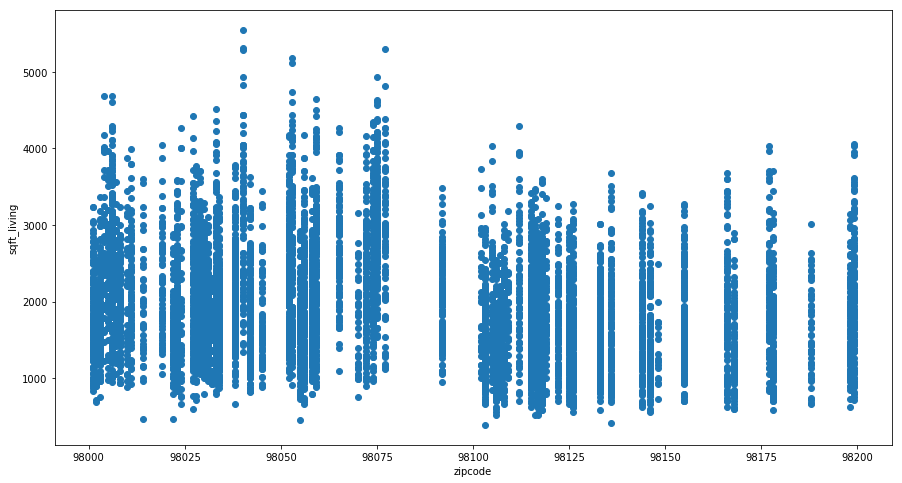

In [20]:
plt.figure(figsize=(15,8))
plt.plot(df1.zipcode, df1.sqft_living, 'o')
plt.xlabel('zipcode')
plt.ylabel("sqft_living")

This looks better now. We can also observe some relation with the year and clearly there are some outliers too. We can eliminate this by grouping the years together(say 10) and applying univariate technique

In [21]:
# deviding data into 12 based on year
# year is yr_built if there is no renovationn, else yr_renovated
for i in range(12):
    # select data for 10 years only
    dfz = df1[df1.apply(lambda x: ((x.yr_built >= 1900+i*10) & (x.yr_built < 1900+(i+1)*10)) if x.yr_renovated == 0 else ((x.yr_renovated > 1900+i*10) & (x.yr_renovated < 1900+(i+1)*10)), axis=1)]
    # ggetting the quarantiles
    q7 = dfz.sqft_living.quantile(.75)
    q2 = dfz.sqft_living.quantile(.25)
    q5 = dfz.sqft_living.quantile(.50)
    # upper and lower limits for detecting ouliers
    upper_limit = q7 + 1.5*(q7-q2)
    lower_limit = q2 - 1.5*(q7-q2)
    # filtering
    df1 = df1[df1.apply(lambda x: ((x.sqft_living > lower_limit) & (x.sqft_living < upper_limit)) if (x.id in list(dfz.id)) else True, axis = 1)]

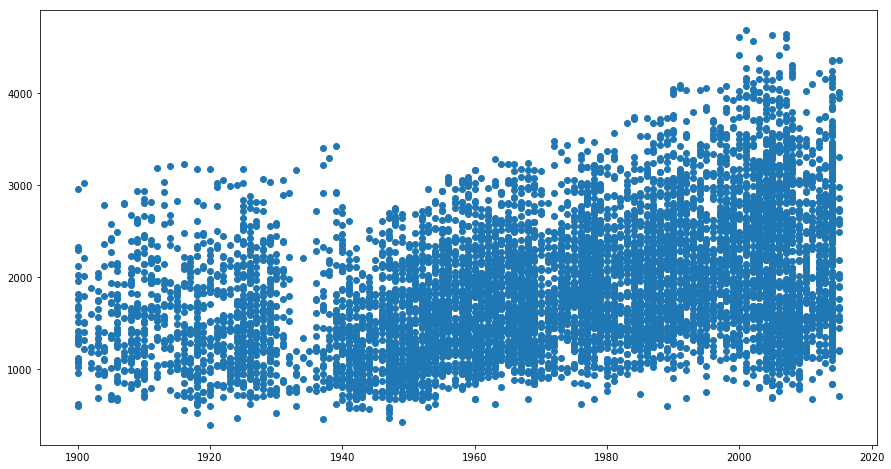

In [22]:
# plotting year vs sqft living
plt.figure(figsize=(15,8))
plt.plot(df1.apply(lambda x: x.yr_built if (x.yr_renovated == 0) else x.yr_renovated, axis=1), df1.sqft_living, 'o')

### Bedrooms

Bedrooms may have relations with sqft_above. We plot this.

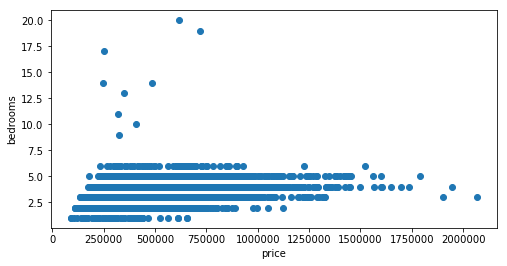

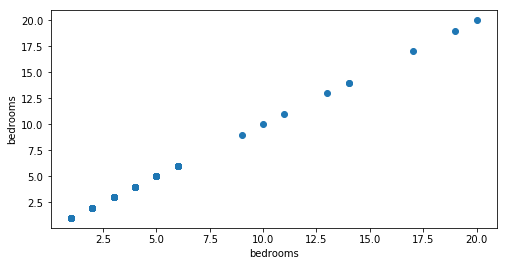

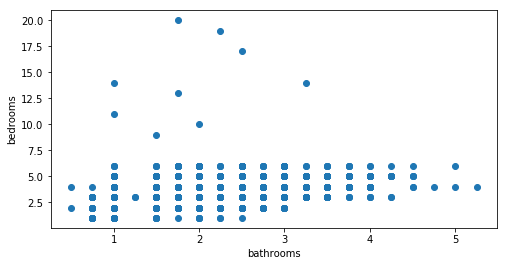

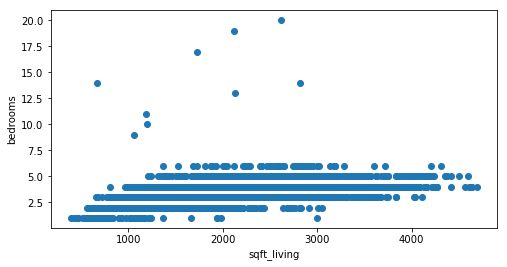

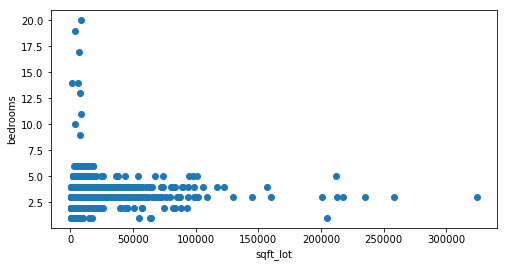

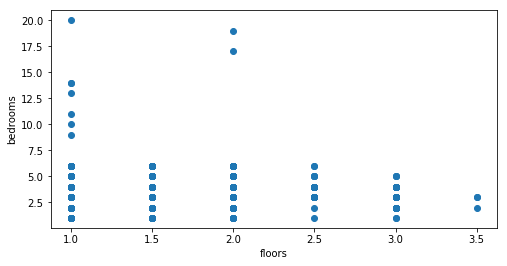

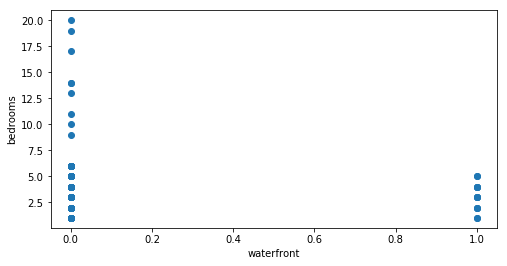

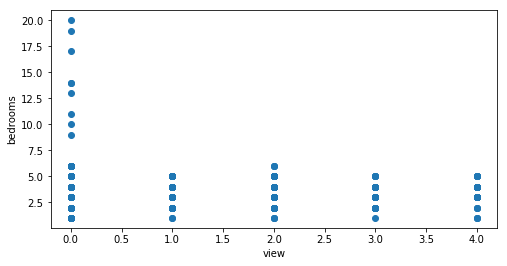

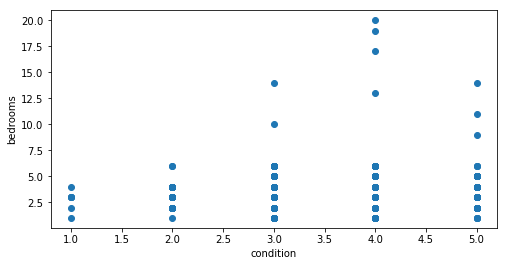

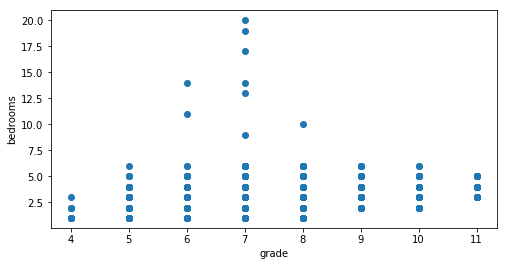

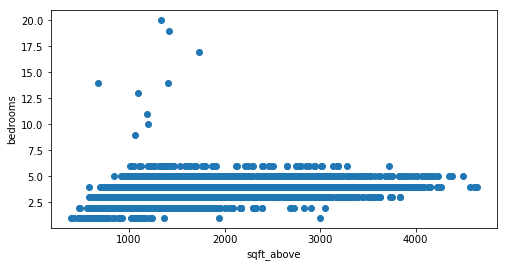

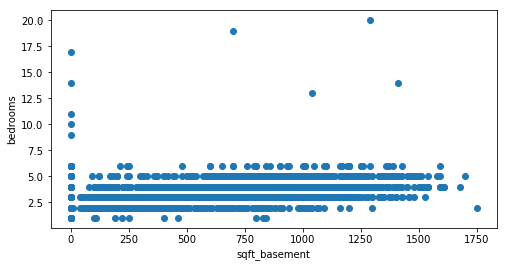

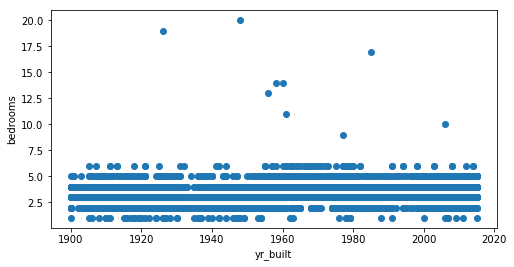

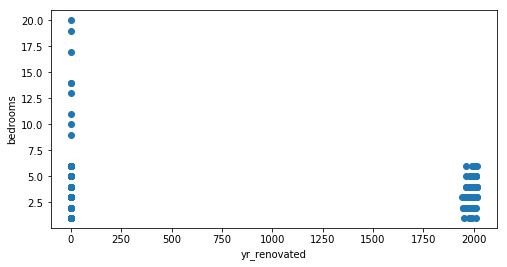

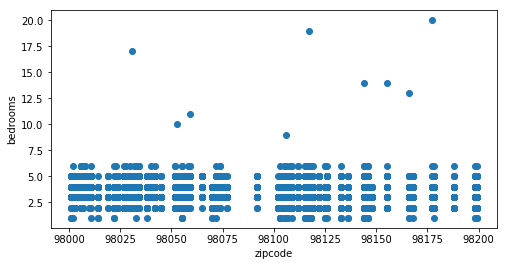

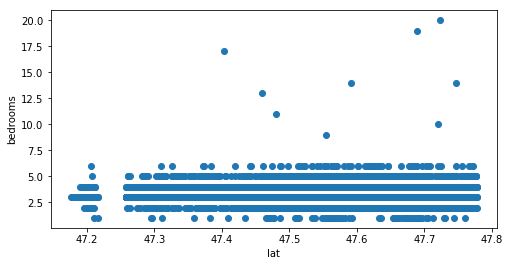

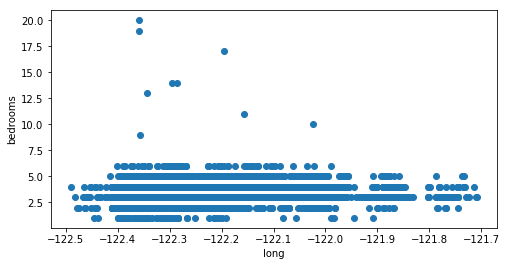

In [23]:
for c in df1.columns[2:]:
    plt.figure(figsize=(8,4))
    plt.plot(df1[c], df1.bedrooms, 'o')
    plt.xlabel(c)
    plt.ylabel("bedrooms")

We can see that there is a lower limit for this plot which means if there is n bedrooms, then there should be a minimum sqft_above size f(n). We remove all points which do not fall in this. We plot it again to make clear.

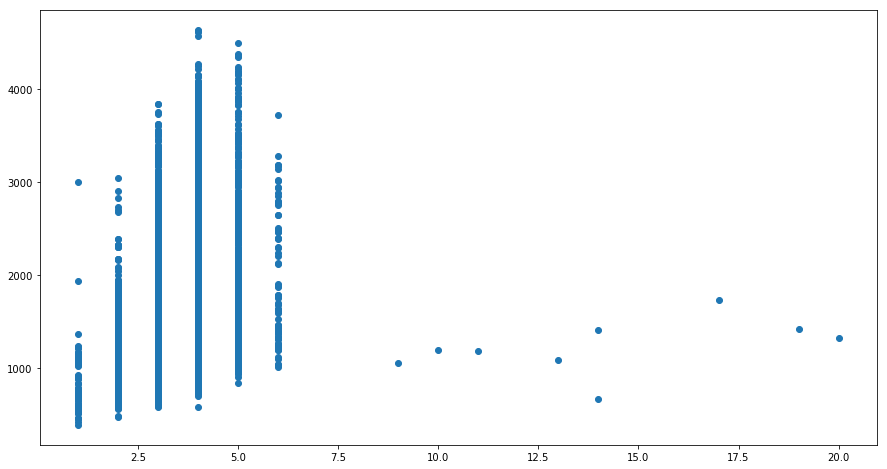

In [24]:
# plotting bedroom vs sqft above
plt.figure(figsize=(15,8))
plt.plot(df1.bedrooms, df1.sqft_above, 'o')

In [25]:
# removing observable outliers
df1 = df1[df1.apply(lambda x: (x.bedrooms < 7.5), axis= 1)]

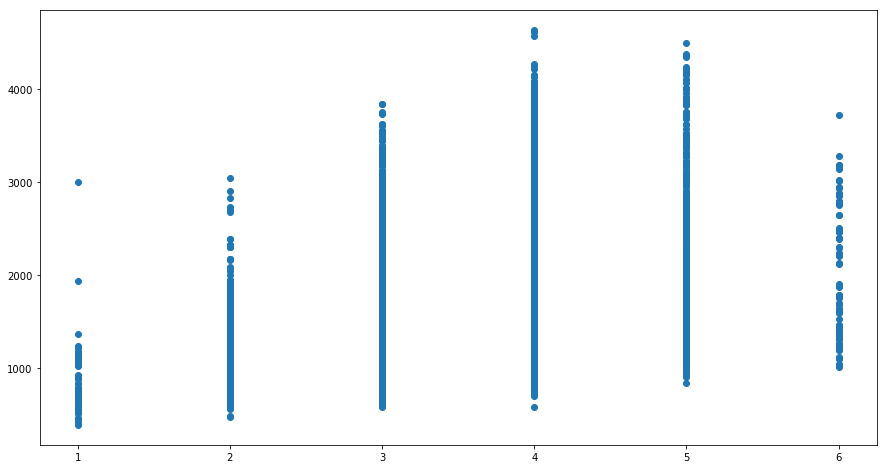

In [26]:
# testing again
plt.figure(figsize=(15,8))
plt.plot(df1.bedrooms, df1.sqft_above, 'o')

As from the plot, now the largest value of bedrooms is 10. This is a bit high value, but still we keep. Another issues we notice is the possible univariate outlier in sqft_above axis. We perform univariate analysis for each bedroom number seperately.

In [27]:
# checking for each bedroom count
for i in df1.bedrooms.unique():
    dfz = df1[df1.bedrooms == i]
    # calculating quarantiles
    q7 = dfz.sqft_above.quantile(.75)
    q2 = dfz.sqft_above.quantile(.25)
    q5 = dfz.sqft_above.quantile(.50)
    # upper and lower limits for detecting ouliers
    upper_limit = q7 + 1.5*(q7-q2)
    lower_limit = q2 - 1.5*(q7-q2)
    df1 = df1[df1.apply(lambda x: ((x.sqft_above > lower_limit) & (x.sqft_above < upper_limit)) if (x.id in list(dfz.id)) else True, axis = 1)]

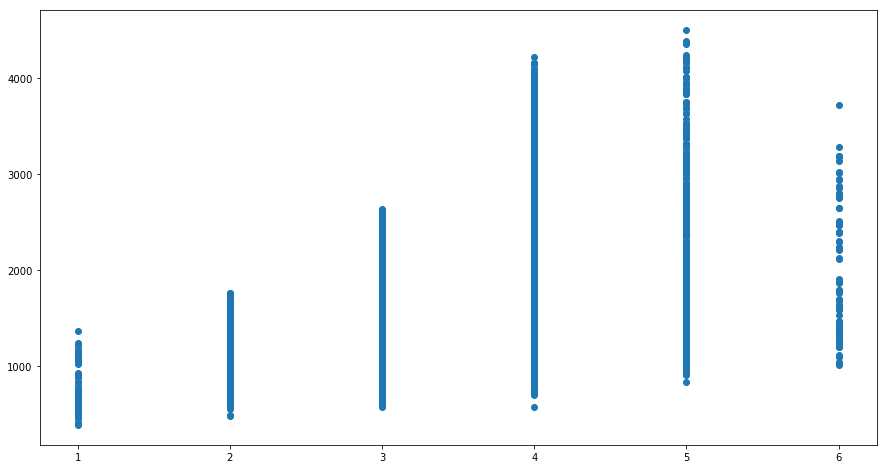

In [28]:
# testing again
plt.figure(figsize=(15,8))
plt.plot(df1.bedrooms, df1.sqft_above, 'o')

### Bathrooms

we first check for number of bathrooms signifiantly higher than number of bedrooms

In [29]:
# check for number of bathrooms signifiantly higher than number of bedrooms
df1[df1.apply(lambda x: x.bathrooms > x.bedrooms+1, axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
356,6450304600,20141023T000000,315000.0,1,2.25,1940,2550,2.0,0,0,4,7,1100,840,1979,0,98133,47.7313,-122.343
1791,1720800305,20141119T000000,611900.0,1,2.25,1220,2100,2.0,0,2,4,8,1220,0,1946,1979,98033,47.6703,-122.204
2749,98000950,20141210T000000,1060000.0,4,5.25,4140,14757,2.0,0,2,3,11,4140,0,2005,0,98075,47.5871,-121.969
8619,7461400360,20150421T000000,299000.0,1,2.50,1980,7521,1.0,0,0,4,7,1180,800,1979,0,98055,47.4343,-122.192


Except the third one, the others seems to be outliers. So we remove them

In [30]:
# removing outliers
df1 = df1[df1.id.apply(lambda x: x not in [6450304600, 1720800305,7461400360])]

### Price

Price may depend onvarious factors. We plot it vs everything and see.

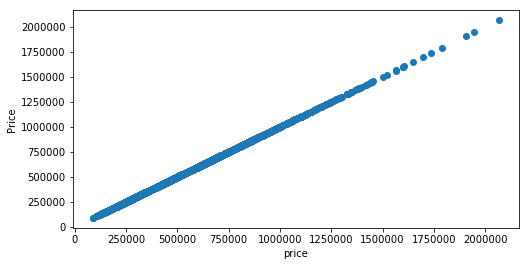

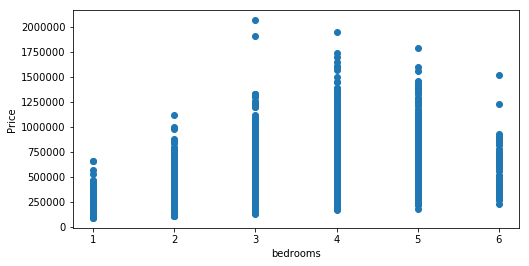

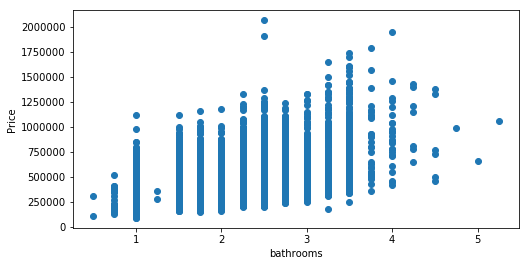

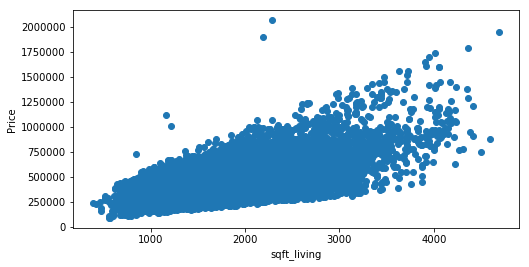

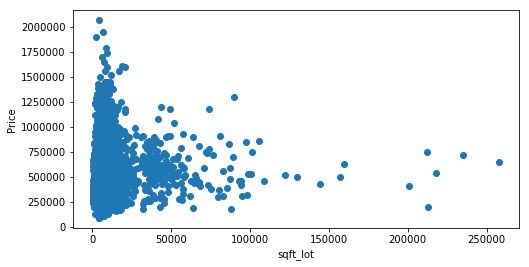

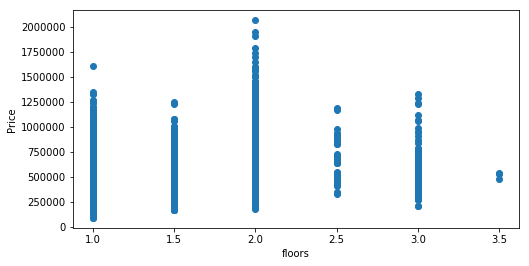

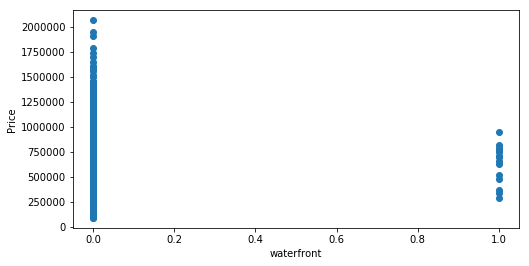

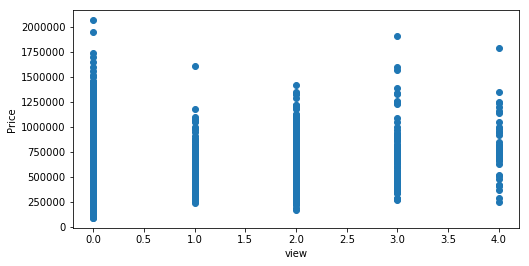

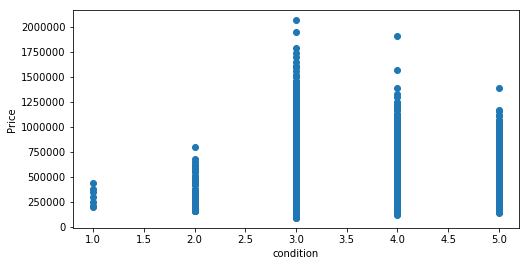

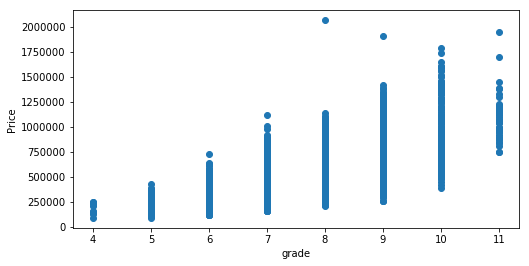

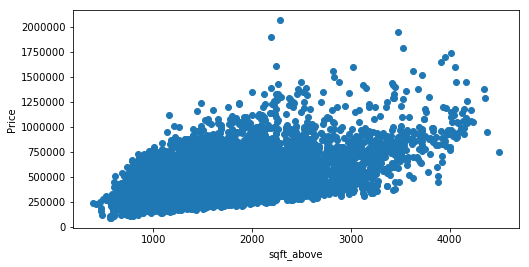

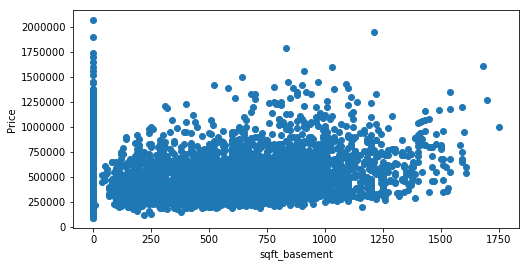

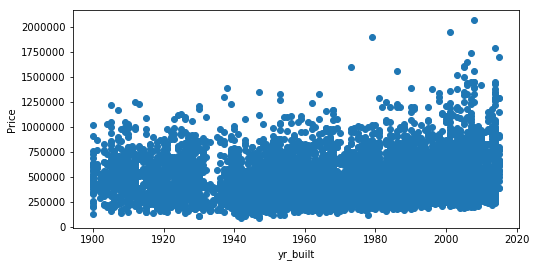

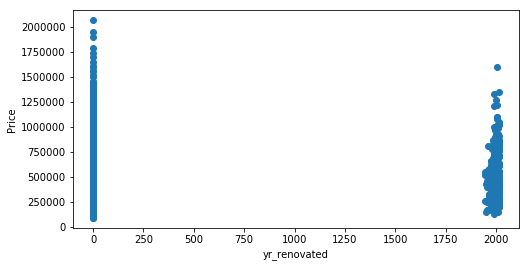

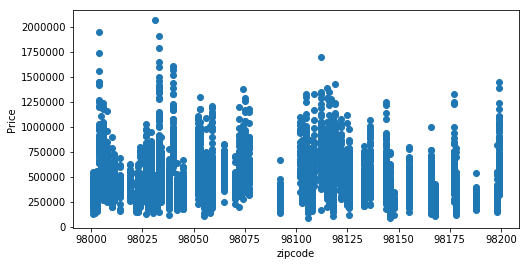

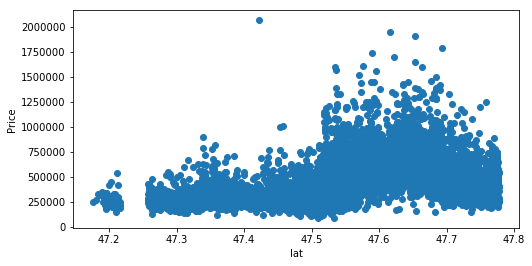

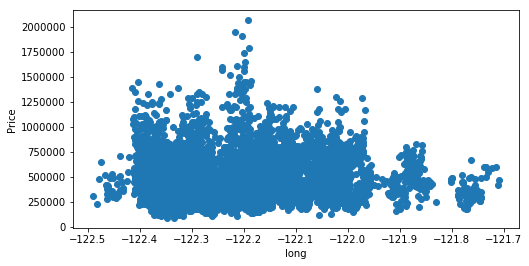

In [31]:
# plotting price vs everything
for c in df1.columns[2:]:
    plt.figure(figsize=(8,4))
    plt.plot(df1[c], df1.price, 'o')
    plt.xlabel(c)
    plt.ylabel("Price")

Clear correlation is found between price and sqft living, grade. 

We first use linear regression to remove multivariate outliers in price vs [sqft, grade]. We use statsmodels libraries outlier testing method for this (StatsModel, 2018). This is based on linear regression. It fits the linear regression first and checks the distance of the points from the regression line.

In [32]:
# defining input and target
X = df1[['grade', 'sqft_living']]
Y = df1.price
#creating the model and fitting
regression = sm.OLS(Y,X).fit()
# testing for outlies
test = regression.outlier_test(alpha = .5)
# removing outliers
df1 = df1[test['bonf(p)'] == 1]

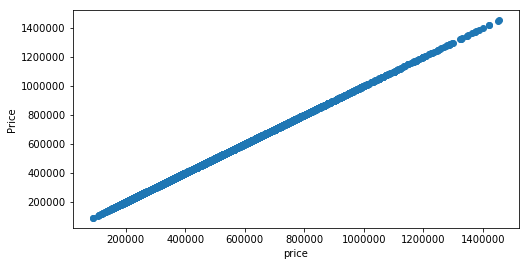

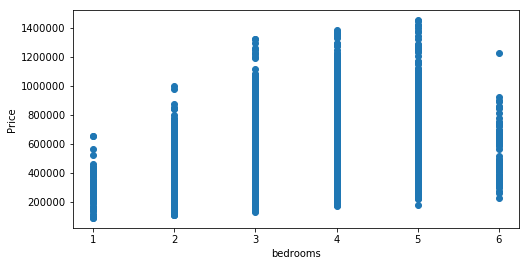

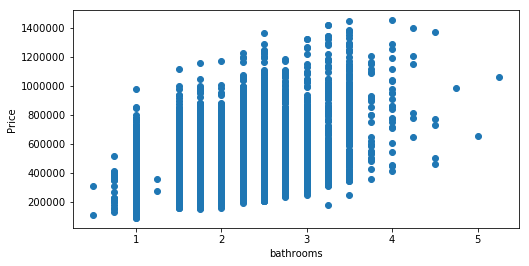

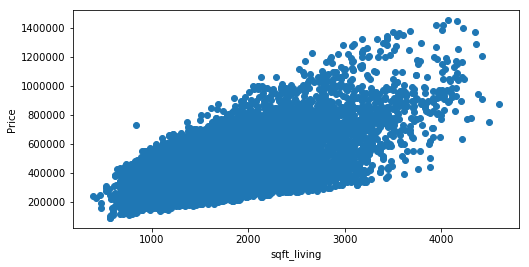

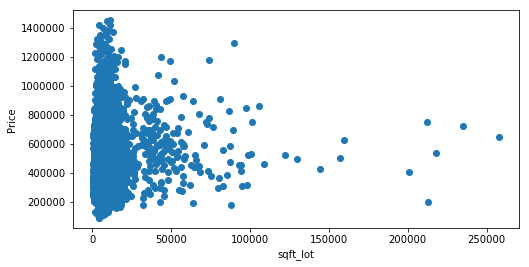

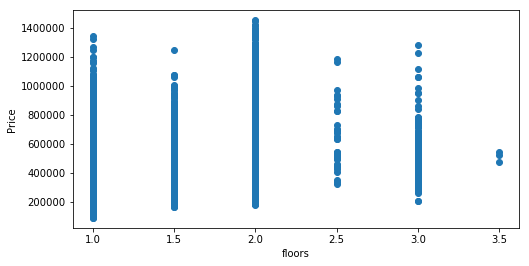

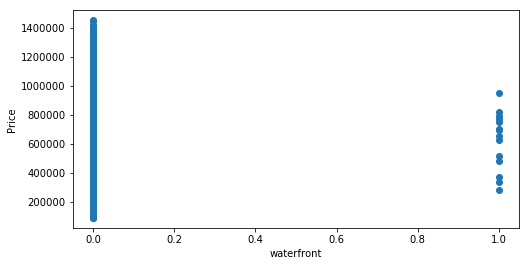

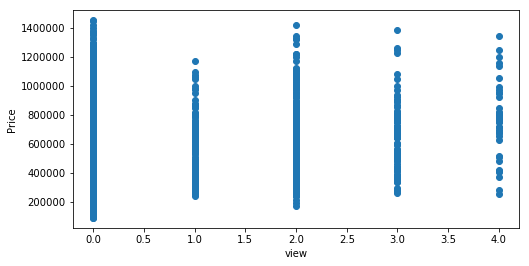

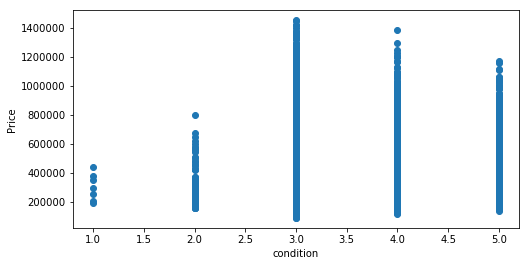

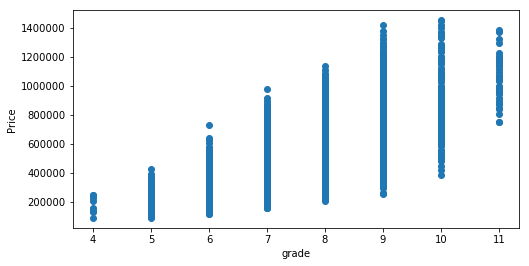

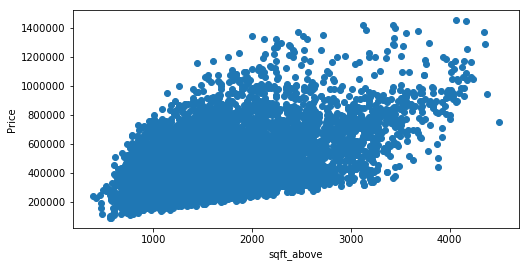

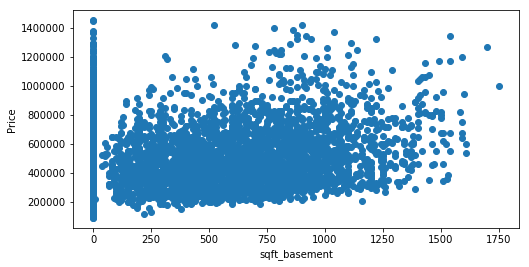

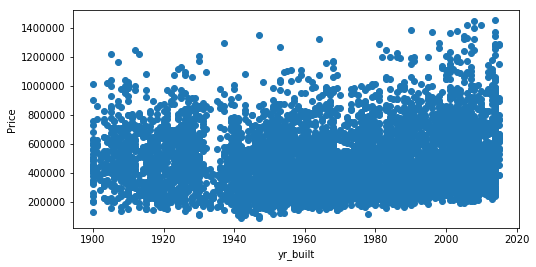

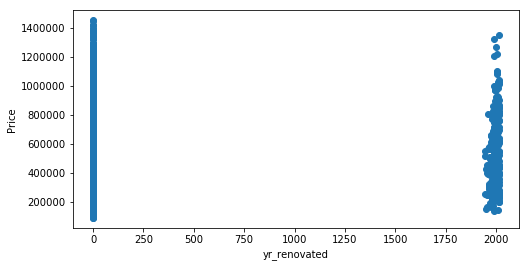

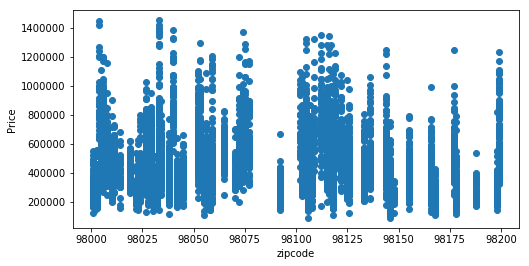

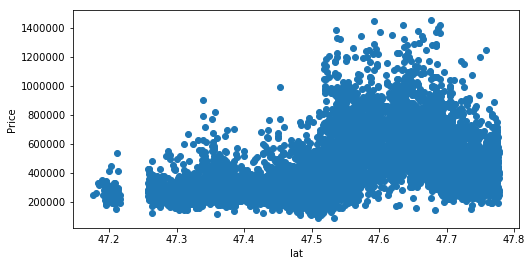

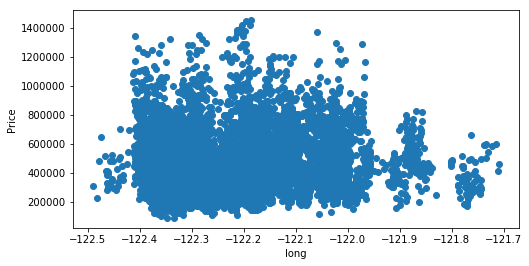

In [33]:
# we check again
# plotting price vs everything
for c in df1.columns[2:]:
    plt.figure(figsize=(8,4))
    plt.plot(df1[c], df1.price, 'o')
    plt.xlabel(c)
    plt.ylabel("Price")

A comparison shows we have many outliers.

## 5. Storing the Data 

Now we have the corrected dataset. We store it in the file as mentioned in the question

In [34]:
# storing data into file
df1.to_csv("dataset4_solution.csv", encoding = 'utf-8', index=False)

## Summary

We have performed outlier detection variable by variable. We used variuos methods including univariate and multivariate detection methods for detecting the ouliers.

We have tried to consider all the possible relations between variables while performing outlier detection

## Reference

- Pearson R K. (2018). *'Mining Imperfect Data'*. 1st ed.
- StatsModel (2018). *'Outlier detection'*. Retrieved from http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.outlier_test.html
